# Analize the dataset

This notebook contains the analysis of the Dataset. It uses `torch` and `torchvision` compute the analysis and `matplotlib` to demostrate the results.

This notebook has analysis several things, like

1. The Normalize values of the dataset i.e. the `Mean` and `STD`
2. The heights and weights of the images in the dataset

In [1]:
import numpy as np

import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder

import matplotlib.pyplot as plt

> Using the `ImageFolder` function from `torchvision` to load the dataset with `ToTensor` transform, so that each image will convert into `Tensor` and will help to compute easily

In [2]:
f = ImageFolder(root="./dataset/", transform=transforms.Compose([transforms.ToTensor()]))

> Computing the `Normalization` values by iterating over the dataset

In [3]:
mean = torch.zeros(3)
std = torch.zeros(3)

heights = []
weights = []

for image, _ in f:
    mean += torch.mean(image, (1,2))
    std += torch.std(image, (1,2))
    _, h, w = image.size()
    heights.append(h)
    weights.append(w)

In [4]:
print(f"Mean: {mean/len(f)}")
print(f"STD: {std/len(f)}")

Mean: tensor([0.4728, 0.4762, 0.4692])
STD: tensor([0.2558, 0.2532, 0.2457])


(array([2725., 2055., 1323.,  895.,  583.,  431.,  334.,  252.,  160.,
         138.]),
 array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
        1800., 2000.]),
 [<matplotlib.patches.Polygon at 0x25307302370>])

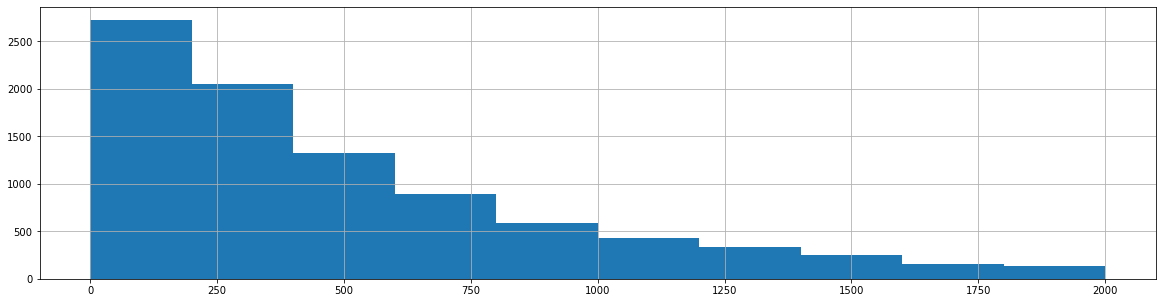

In [28]:
plt.figure(figsize=(20,5))
plt.grid()
plt.hist(heights, range=(0,2000), histtype='stepfilled')

(array([6.479e+03, 1.924e+03, 5.490e+02, 1.830e+02, 5.800e+01, 3.000e+01,
        2.000e+00, 1.200e+01, 0.000e+00, 3.000e+00]),
 array([4.000e+00, 8.480e+02, 1.692e+03, 2.536e+03, 3.380e+03, 4.224e+03,
        5.068e+03, 5.912e+03, 6.756e+03, 7.600e+03, 8.444e+03]),
 [<matplotlib.patches.Polygon at 0x25306fb9d30>])

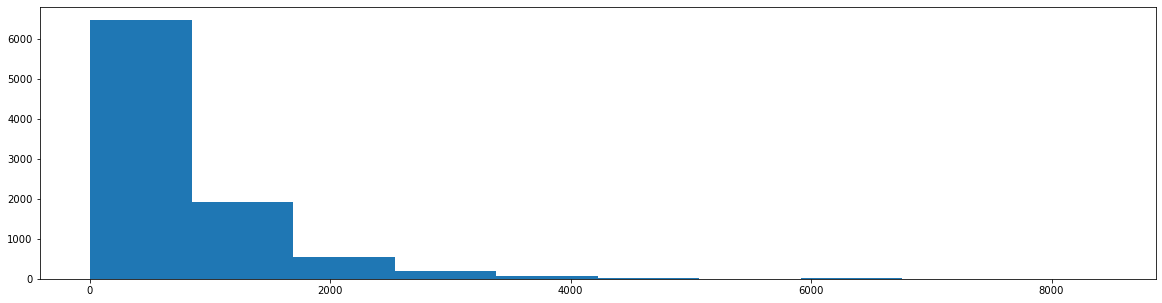

In [20]:
plt.figure(figsize=(20,5))
plt.hist(weights, histtype='stepfilled')